# Ensemble Methods

**Ensemble methods** are machine learning methods that aggregate the predictions of a group of base learners in order to form a single learning model. For example, imagine that each person in this [video](https://www.youtube.com/watch?v=iOucwX7Z1HU&t=203s) is a trained machine learning model and notice the average of their predictions is a much more accurate prediction that the individual predictions. In this lecture we will consider three types of ensemble concepts and methods. Namely, 
1. **Hard Voting**

2. **Bagging**

3. **Random Forests**

In the rest of this notebook we explore these concepts. 


       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

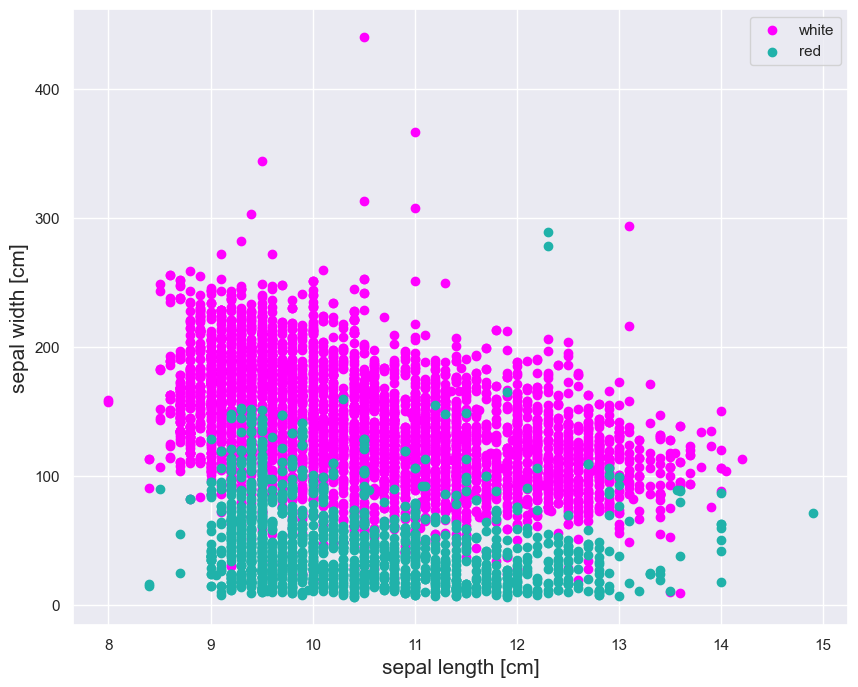

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
iris = pd.read_csv("Datasets/winequalityN.csv")
iris = iris.dropna()
print(iris)
X = iris[["alcohol","total sulfur dioxide"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "white":
        return 0
    else:
        return 1
         
# Create target value array
y = iris["type"].map(make_labels).to_numpy()

# Plot the data
flowers = ["white","red"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = iris[iris.type == species]
    ax.scatter(temp_df["alcohol"],
               temp_df["total sulfur dioxide"],
               c = color,
               label = species, 
               )
    
ax.set_xlabel("sepal length [cm]", fontsize = 15)
ax.set_ylabel("sepal width [cm]", fontsize = 15)
ax.legend()
plt.show()

In [106]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.919953596287703
logistic regression accuracy: 0.9265274555297757
random forest accuracy: 0.9261407579273009
voting classifier accuracy: 0.9269141531322506


## Bagging

In [107]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1934
           1       0.92      0.78      0.85       652

    accuracy                           0.93      2586
   macro avg       0.93      0.88      0.90      2586
weighted avg       0.93      0.93      0.93      2586
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1934
           1       0.91      0.81      0.86       652

    accuracy                           0.93      2586
   macro avg       0.92      0.89      0.91      2586
weighted avg       0.93      0.93      0.93      2586
 



In [108]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1934
           1       0.92      0.80      0.85       652

    accuracy                           0.93      2586
   macro avg       0.93      0.89      0.90      2586
weighted avg       0.93      0.93      0.93      2586
 



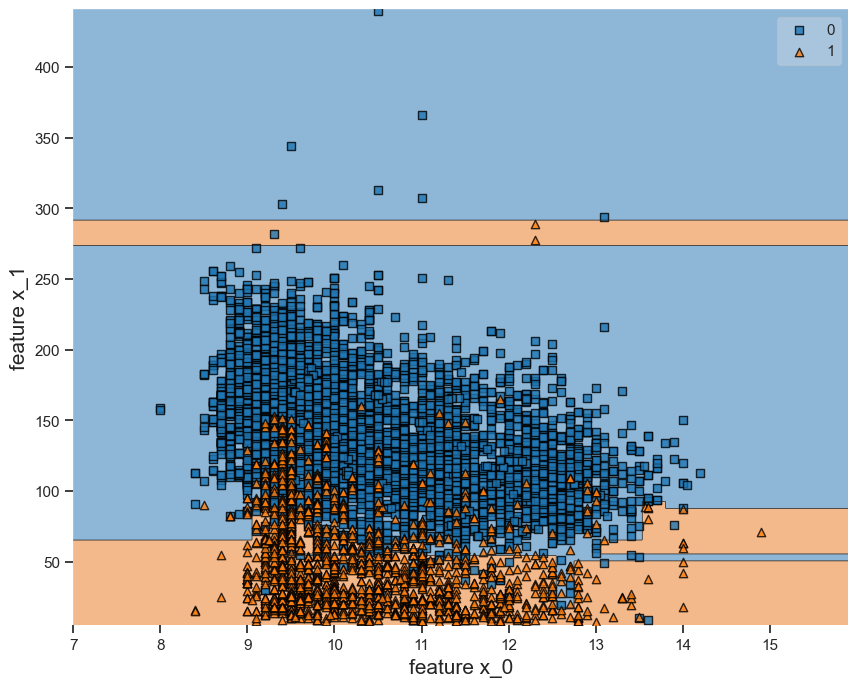

In [109]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

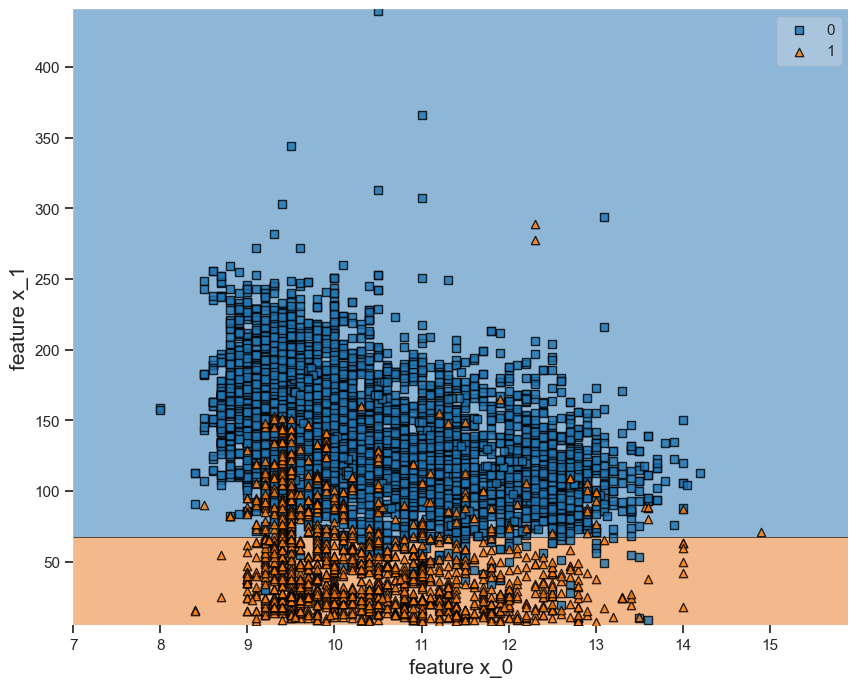

In [110]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

## Random Forests 
Technically speaking, the above bagging model is called a **Random forest**. Such a model exists inside the ```sklearn.ensemble``` module, and is the ```DecisionTreeClassifier``` class. However, the random forest algorithm used in training the ```RandomForestClassifier``` class introduces extra randomness when growing trees; instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in even lower variance of the fit model. 

Run the following code cell and compare the three models. 

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")



Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1933
           1       0.86      0.79      0.82       653

    accuracy                           0.91      2586
   macro avg       0.89      0.87      0.88      2586
weighted avg       0.91      0.91      0.91      2586
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1933
           1       0.90      0.77      0.83       653

    accuracy                           0.92      2586
   macro avg       0.91      0.87      0.89      2586
weighted avg       0.92      0.92      0.92      2586
 



In [112]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1933
           1       0.90      0.77      0.83       653

    accuracy                           0.92      2586
   macro avg       0.91      0.87      0.89      2586
weighted avg       0.92      0.92      0.92      2586
 



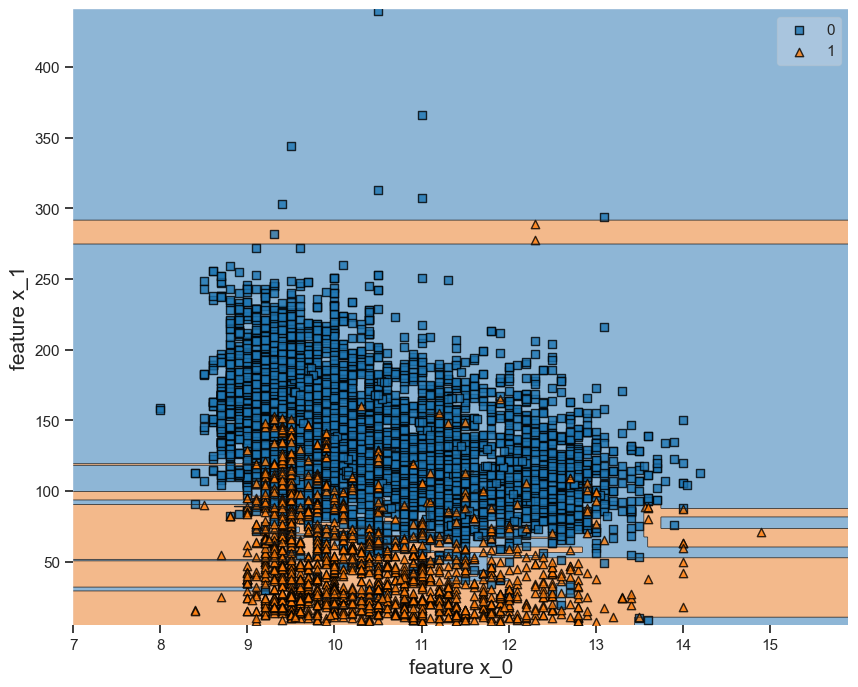

In [113]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

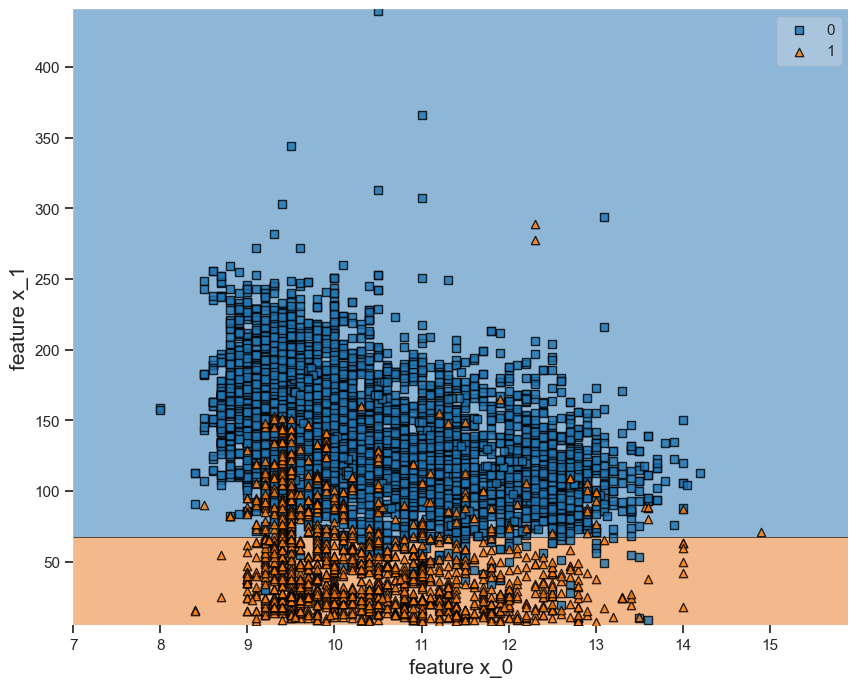

In [114]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

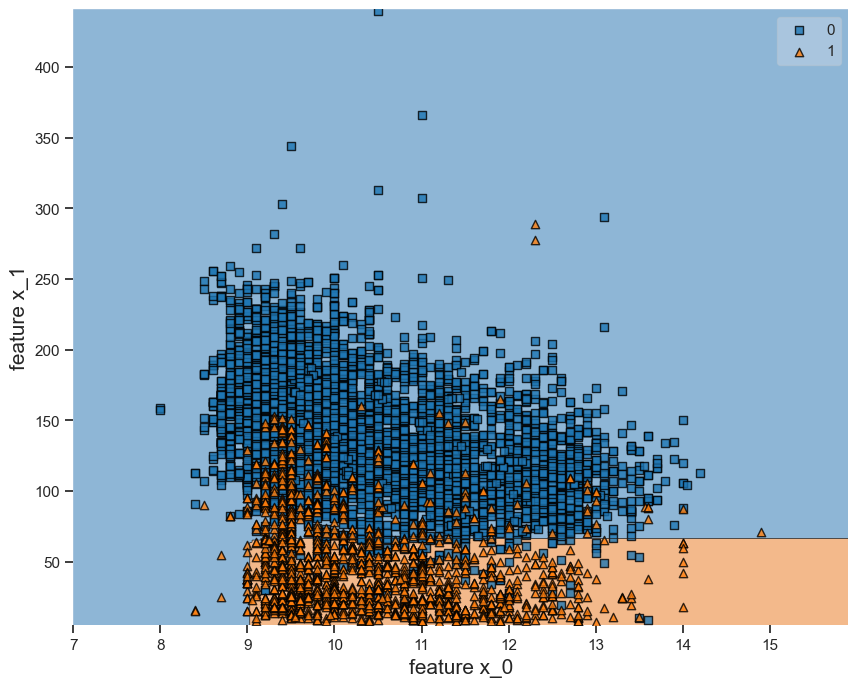

In [115]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [116]:
from sklearn.ensemble import RandomForestClassifier
iris = iris.dropna()
X = iris[["fixed acidity","residual sugar","total sulfur dioxide","pH"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1933
           1       0.92      0.89      0.90       653

    accuracy                           0.95      2586
   macro avg       0.94      0.93      0.94      2586
weighted avg       0.95      0.95      0.95      2586
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1933
           1       0.90      0.77      0.83       653

    accuracy                           0.92      2586
   macro avg       0.91      0.87      0.89      2586
weighted avg       0.92      0.92      0.92      2586
 



In [117]:
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1933
           1       0.90      0.77      0.83       653

    accuracy                           0.92      2586
   macro avg       0.91      0.87      0.89      2586
weighted avg       0.92      0.92      0.92      2586
 



In [118]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1933
           1       0.90      0.77      0.83       653

    accuracy                           0.92      2586
   macro avg       0.91      0.87      0.89      2586
weighted avg       0.92      0.92      0.92      2586
 



## Feature Importance 

One cool thing about random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest. For example, consider running the following code cell. 

In [121]:
names = ["fixed acidity","residual sugar","total sulfur dioxide","pH"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

fixed acidity 0.14743765762698527
residual sugar 0.13934036628793742
total sulfur dioxide 0.6710277757560802
pH 0.04219420032899707
